In [148]:
import torch, numpy as np, pandas as pd

In [149]:
df = pd.read_csv("titanic.csv")
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S


In [150]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [152]:
df.fillna(modes, inplace=True)

In [153]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [154]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


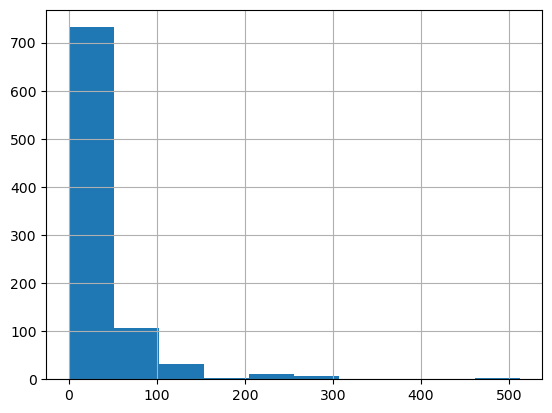

In [155]:
df['Fare'].hist();

In [156]:
df['LogFare'] = np.log(df['Fare']+1)

<Axes: >

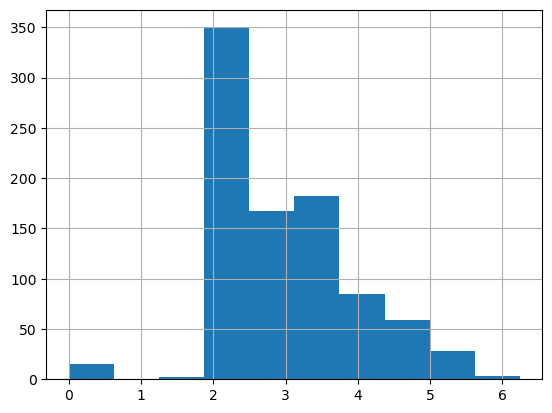

In [157]:
df['LogFare'].hist()

In [158]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [159]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [160]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [161]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,True,False,False,False,True,False,False,True
1,False,True,True,False,False,True,False,False
2,False,True,False,False,True,False,False,True
3,False,True,True,False,False,False,False,True
4,True,False,False,False,True,False,False,True


In [162]:
from torch import tensor

t_dep = tensor(df.Survived)

In [163]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

# Before tensor conversion, ensure all columns are float32
df[indep_cols] = df[indep_cols].astype(np.float32)

t_indep = tensor(df[indep_cols].values, dtype=torch.float32)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [164]:
t_indep.shape

torch.Size([891, 12])

# linear model

In [165]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625])

In [166]:
t_indep*coeffs

tensor([[-10.1838,   0.1386,   0.0000,  ...,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  ...,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  ...,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.1096,   0.1386,   0.4818,  ...,  -0.0000,   0.0000,   0.3625],
        [-12.0354,   0.0000,   0.0000,  ...,  -0.4392,   0.0000,   0.0000],
        [-14.8128,   0.0000,   0.0000,  ...,  -0.0000,   0.2103,   0.0000]])

In [167]:
vals, indices = t_indep.max(dim=0)
t_indep = t_indep/vals

In [168]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000,  ..., -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000,  ..., -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000,  ..., -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1389,  0.0173,  0.0803,  ..., -0.0000,  0.0000,  0.3625],
        [-0.1504,  0.0000,  0.0000,  ..., -0.4392,  0.0000,  0.0000],
        [-0.1852,  0.0000,  0.0000,  ..., -0.0000,  0.2103,  0.0000]])

In [169]:
preds = (t_indep*coeffs).sum(axis=1)

In [170]:
preds[:10]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,
         0.1613, -0.6285])

In [171]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5382)

In [172]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [173]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [174]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [175]:
loss.backward()

In [176]:
coeffs.grad

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,
         0.1425, -0.1886, -0.0191,  0.2043])

In [177]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5197)


# training the model

In [178]:
from fastai.data.transforms import RandomSplitter
trn_split, val_split = RandomSplitter(seed=42)(df)

In [179]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [180]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [181]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [182]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [183]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [184]:
coeffs = train_model(18, lr=0.2)

0.536; 0.502; 0.477; 0.454; 0.431; 0.409; 0.388; 0.367; 0.349; 0.336; 0.330; 0.326; 0.329; 0.304; 0.314; 0.296; 0.300; 0.289; 

In [185]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'LogFare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

# Measuring accuracy

In [186]:
preds = calc_preds(coeffs, val_indep)

In [187]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False,  True,  True, False])

In [188]:
results.float().mean()

tensor(0.7865)

In [189]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7865)

# using sigmoid

In [190]:
preds[:28]

tensor([ 0.8160,  0.1295, -0.0148,  0.1831,  0.1520,  0.1350,  0.7279,  0.7754,
         0.3222,  0.6740,  0.0753,  0.0389,  0.2216,  0.7631,  0.0678,  0.3997,
         0.3324,  0.8278,  0.1078,  0.7126,  0.1023,  0.3627,  0.9937,  0.8050,
         0.1153,  0.1455,  0.8652,  0.3425])

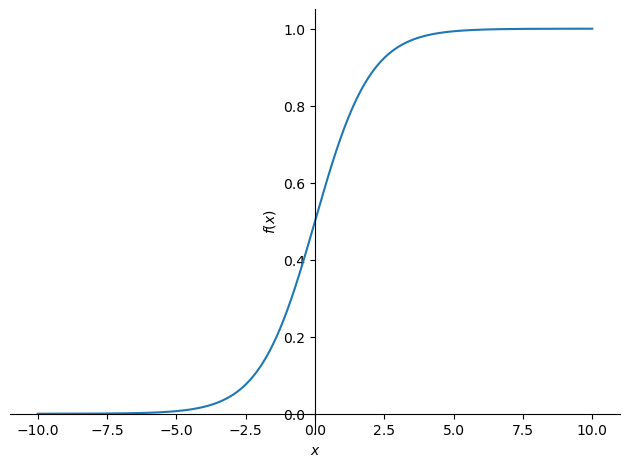

In [191]:
import sympy as sp

x = sp.symbols('x')
expr = 1/(1 + sp.exp(-x))
sp.plot(expr, (x, -10, 10))


In [192]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [193]:
coeffs = train_model(lr=100)

0.510; 0.327; 0.294; 0.207; 0.201; 0.199; 0.198; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [194]:
acc(coeffs)

tensor(0.8258)

In [195]:
show_coeffs()

{'Age': tensor(-1.5061),
 'SibSp': tensor(-1.1575),
 'Parch': tensor(-0.4267),
 'LogFare': tensor(0.2543),
 'Sex_male': tensor(-10.3320),
 'Sex_female': tensor(8.4185),
 'Pclass_1': tensor(3.8389),
 'Pclass_2': tensor(2.1398),
 'Pclass_3': tensor(-6.2331),
 'Embarked_C': tensor(1.4771),
 'Embarked_Q': tensor(2.1168),
 'Embarked_S': tensor(-4.7958)}

# Using matrix product

In [196]:
(val_indep*coeffs).sum(axis=1)

tensor([ 12.3288, -14.8119, -15.4540, -13.1513, -13.3512, -13.6469,   3.6248,
          5.3429, -22.0878,   3.1233, -21.8742, -15.6421, -21.5504,   3.9393,
        -21.9190, -12.0010, -12.3775,   5.3550, -13.5880,  -3.1015, -21.7237,
        -12.2081,  12.9767,   4.7427, -21.6525, -14.9135,  -2.7433, -12.3210,
        -21.5886,   3.9387,   5.3890,  -3.6196, -21.6296, -21.8454,  12.2159,
         -3.2275, -12.0289,  13.4560, -21.7230,  -3.1366, -13.2462, -21.7230,
        -13.6831,  13.3092, -21.6477,  -3.5868, -21.6854, -21.8316, -14.8158,
         -2.9386,  -5.3103, -22.2384, -22.1097, -21.7466, -13.3780, -13.4909,
        -14.8119, -22.0690, -21.6666, -21.7818,  -5.4439, -21.7407, -12.6551,
        -21.6671,   4.9238, -11.5777, -13.3323, -21.9638, -15.3030,   5.0243,
        -21.7614,   3.1820, -13.4721, -21.7170, -11.6066, -21.5737, -21.7230,
        -11.9652, -13.2382, -13.7599, -13.2170,  13.1347, -21.7049, -21.7268,
          4.9207,  -7.3198,  -5.3081,   7.1065,  11.4948, -13.31

In [197]:
val_indep@coeffs

tensor([ 12.3288, -14.8119, -15.4540, -13.1513, -13.3511, -13.6468,   3.6248,
          5.3429, -22.0878,   3.1233, -21.8742, -15.6421, -21.5504,   3.9393,
        -21.9190, -12.0010, -12.3775,   5.3550, -13.5880,  -3.1015, -21.7237,
        -12.2081,  12.9767,   4.7427, -21.6525, -14.9135,  -2.7433, -12.3210,
        -21.5886,   3.9387,   5.3890,  -3.6196, -21.6296, -21.8454,  12.2159,
         -3.2275, -12.0289,  13.4560, -21.7230,  -3.1366, -13.2462, -21.7230,
        -13.6831,  13.3092, -21.6477,  -3.5868, -21.6854, -21.8316, -14.8158,
         -2.9386,  -5.3103, -22.2384, -22.1097, -21.7466, -13.3780, -13.4909,
        -14.8119, -22.0690, -21.6666, -21.7818,  -5.4439, -21.7407, -12.6551,
        -21.6671,   4.9238, -11.5777, -13.3323, -21.9638, -15.3030,   5.0243,
        -21.7614,   3.1820, -13.4721, -21.7170, -11.6066, -21.5737, -21.7230,
        -11.9652, -13.2382, -13.7599, -13.2170,  13.1347, -21.7049, -21.7268,
          4.9207,  -7.3198,  -5.3081,   7.1065,  11.4948, -13.31

In [198]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)
     
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [199]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [200]:
coeffs = train_model(lr=100)

0.512; 0.323; 0.290; 0.205; 0.200; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [201]:
acc(coeffs)

tensor(0.8258)

# A neural network

In [202]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [203]:
def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)
     
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [204]:
coeffs = train_model(lr=1.4)

0.543; 0.532; 0.520; 0.505; 0.487; 0.466; 0.439; 0.407; 0.373; 0.343; 0.319; 0.301; 0.286; 0.274; 0.264; 0.256; 0.250; 0.245; 0.240; 0.237; 0.234; 0.231; 0.229; 0.227; 0.226; 0.224; 0.223; 0.222; 0.221; 0.220; 

In [205]:
coeffs = train_model(lr=20)

0.543; 0.400; 0.260; 0.390; 0.221; 0.211; 0.197; 0.195; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [206]:
acc(coeffs)

tensor(0.8258)

# Deep learning

In [207]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [208]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)
     
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [209]:
coeffs = train_model(lr=4)

0.521; 0.483; 0.427; 0.379; 0.379; 0.379; 0.379; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.377; 0.376; 0.371; 0.333; 0.239; 0.224; 0.208; 0.204; 0.203; 0.203; 0.207; 0.197; 0.196; 0.195; 

In [210]:
acc(coeffs)

tensor(0.8258)